# 멀티모달 LLM 사용 관련 토큰 값 산정 및 비용 비교

LangSmith 토큰 값 산정이 지나치게 많이 되는 현상 발견하여, 여러 방식으로 요청을 보내고 모니터링을 비교했습니다.

In [6]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

# LangSmith 추적을 설정합니다. https://smith.langchain.com
# .env 파일에 LANGCHAIN_API_KEY를 입력합니다.
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("TEST_multimodal_token") # set_enable=False 파라미터로 기능 off 가능

Python-dotenv could not parse statement starting at line 2
Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8
Python-dotenv could not parse statement starting at line 9
Python-dotenv could not parse statement starting at line 10
Python-dotenv could not parse statement starting at line 11
Python-dotenv could not parse statement starting at line 12
Python-dotenv could not parse statement starting at line 13
Python-dotenv could not parse statement starting at line 14
Python-dotenv could not parse statement starting at line 15
Python-dotenv could not parse statement starting at line 16


LangSmith 추적을 시작합니다.
[프로젝트명]
TEST_multimodal_token


In [8]:
from langchain_openai import ChatOpenAI
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명
)

# 멀티모달 모델 생성
multi_modal_model = MultiModal(model=llm)


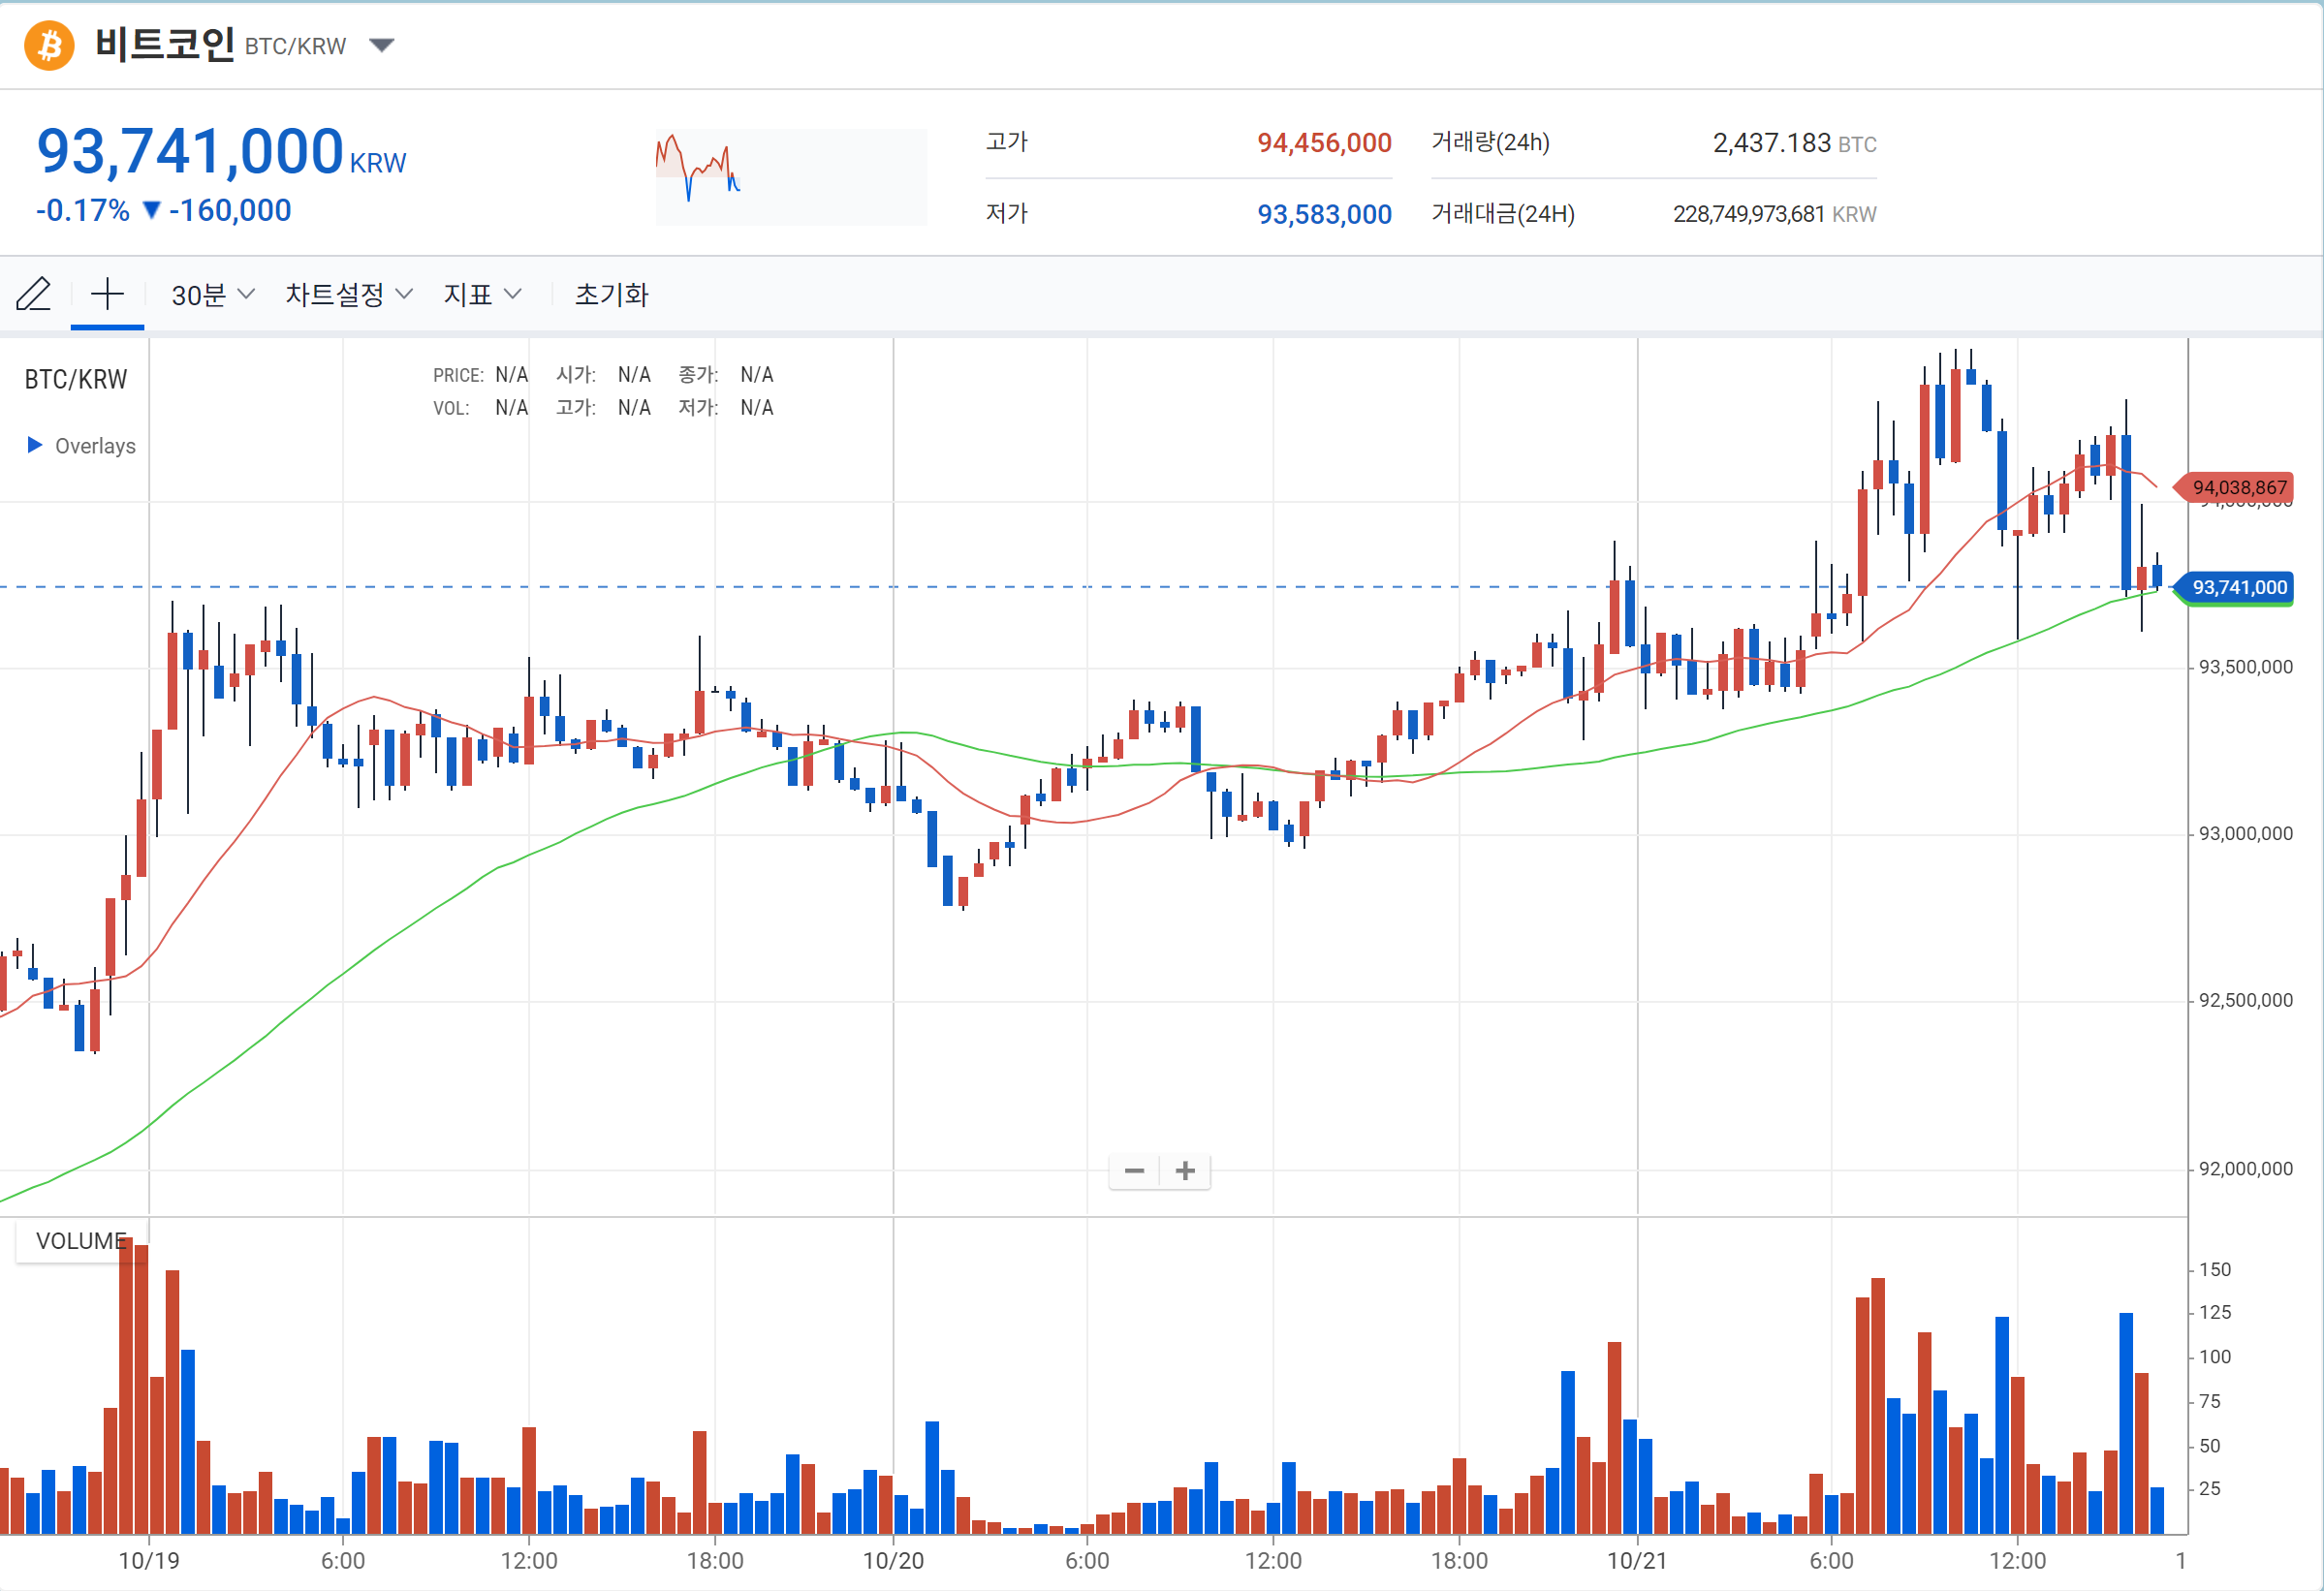

Response Content: 비트코인 차트를 분석해보겠습니다.

1. **가격 변동**: 현재 비트코인 가격은 93,741,000원입니다. 최근 24시간 동안의 최고가는 94,456,000원, 최저가는 93,583,000원으로 나타났습니다. 이는 가격이 비교적 좁은 범위 내에서 움직였음을 의미합니다.

2. **거래량**: 24시간 거래량은 2,437.183 BTC이며, 거래대금은 228,749,973,681 KRW입니다. 이는 시장의 활발한 거래를 나타냅니다.

3. **이동 평균선**: 차트에는 두 개의 이동 평균선이 표시되어 있습니다. 단기 이동 평균선(빨간색)이 장기 이동 평균선(녹색색) 위에 위치해 있으며, 이는 단기적으로 상승 추세를 나타낼 수 있습니다.

4. **캔들 패턴**: 최근 캔들 패턴을 보면, 가격이 상승과 하락을 반복하며 변동성이 있는 모습을 보입니다. 이는 시장의 불확실성을 나타낼 수 있습니다.

5. **거래량 변화**: 거래량은 특정 시간대에 급증하는 모습을 보이며, 이는 해당 시간대에 매수 또는 매도 압력이 강했음을 시사합니다.

전반적으로, 비트코인은 현재 좁은 범위 내에서 거래되고 있으며, 단기적으로는 상승 추세를 보이고 있습니다. 그러나 변동성이 있으므로 주의가 필요합니다.


TypeError: string indices must be integers, not 'str'

In [11]:
user_prompt1 = "오늘 날짜의 비트코인 차트를 분석해주세요."

# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./assets/bitcoin_241021_chart.png"

# invoke를 통해 이미지와 텍스트로 응답 생성
response = multi_modal_model.invoke(IMAGE_PATH_FROM_FILE, user_prompt=user_prompt1)

# 응답 출력
print("Response Content:", response)



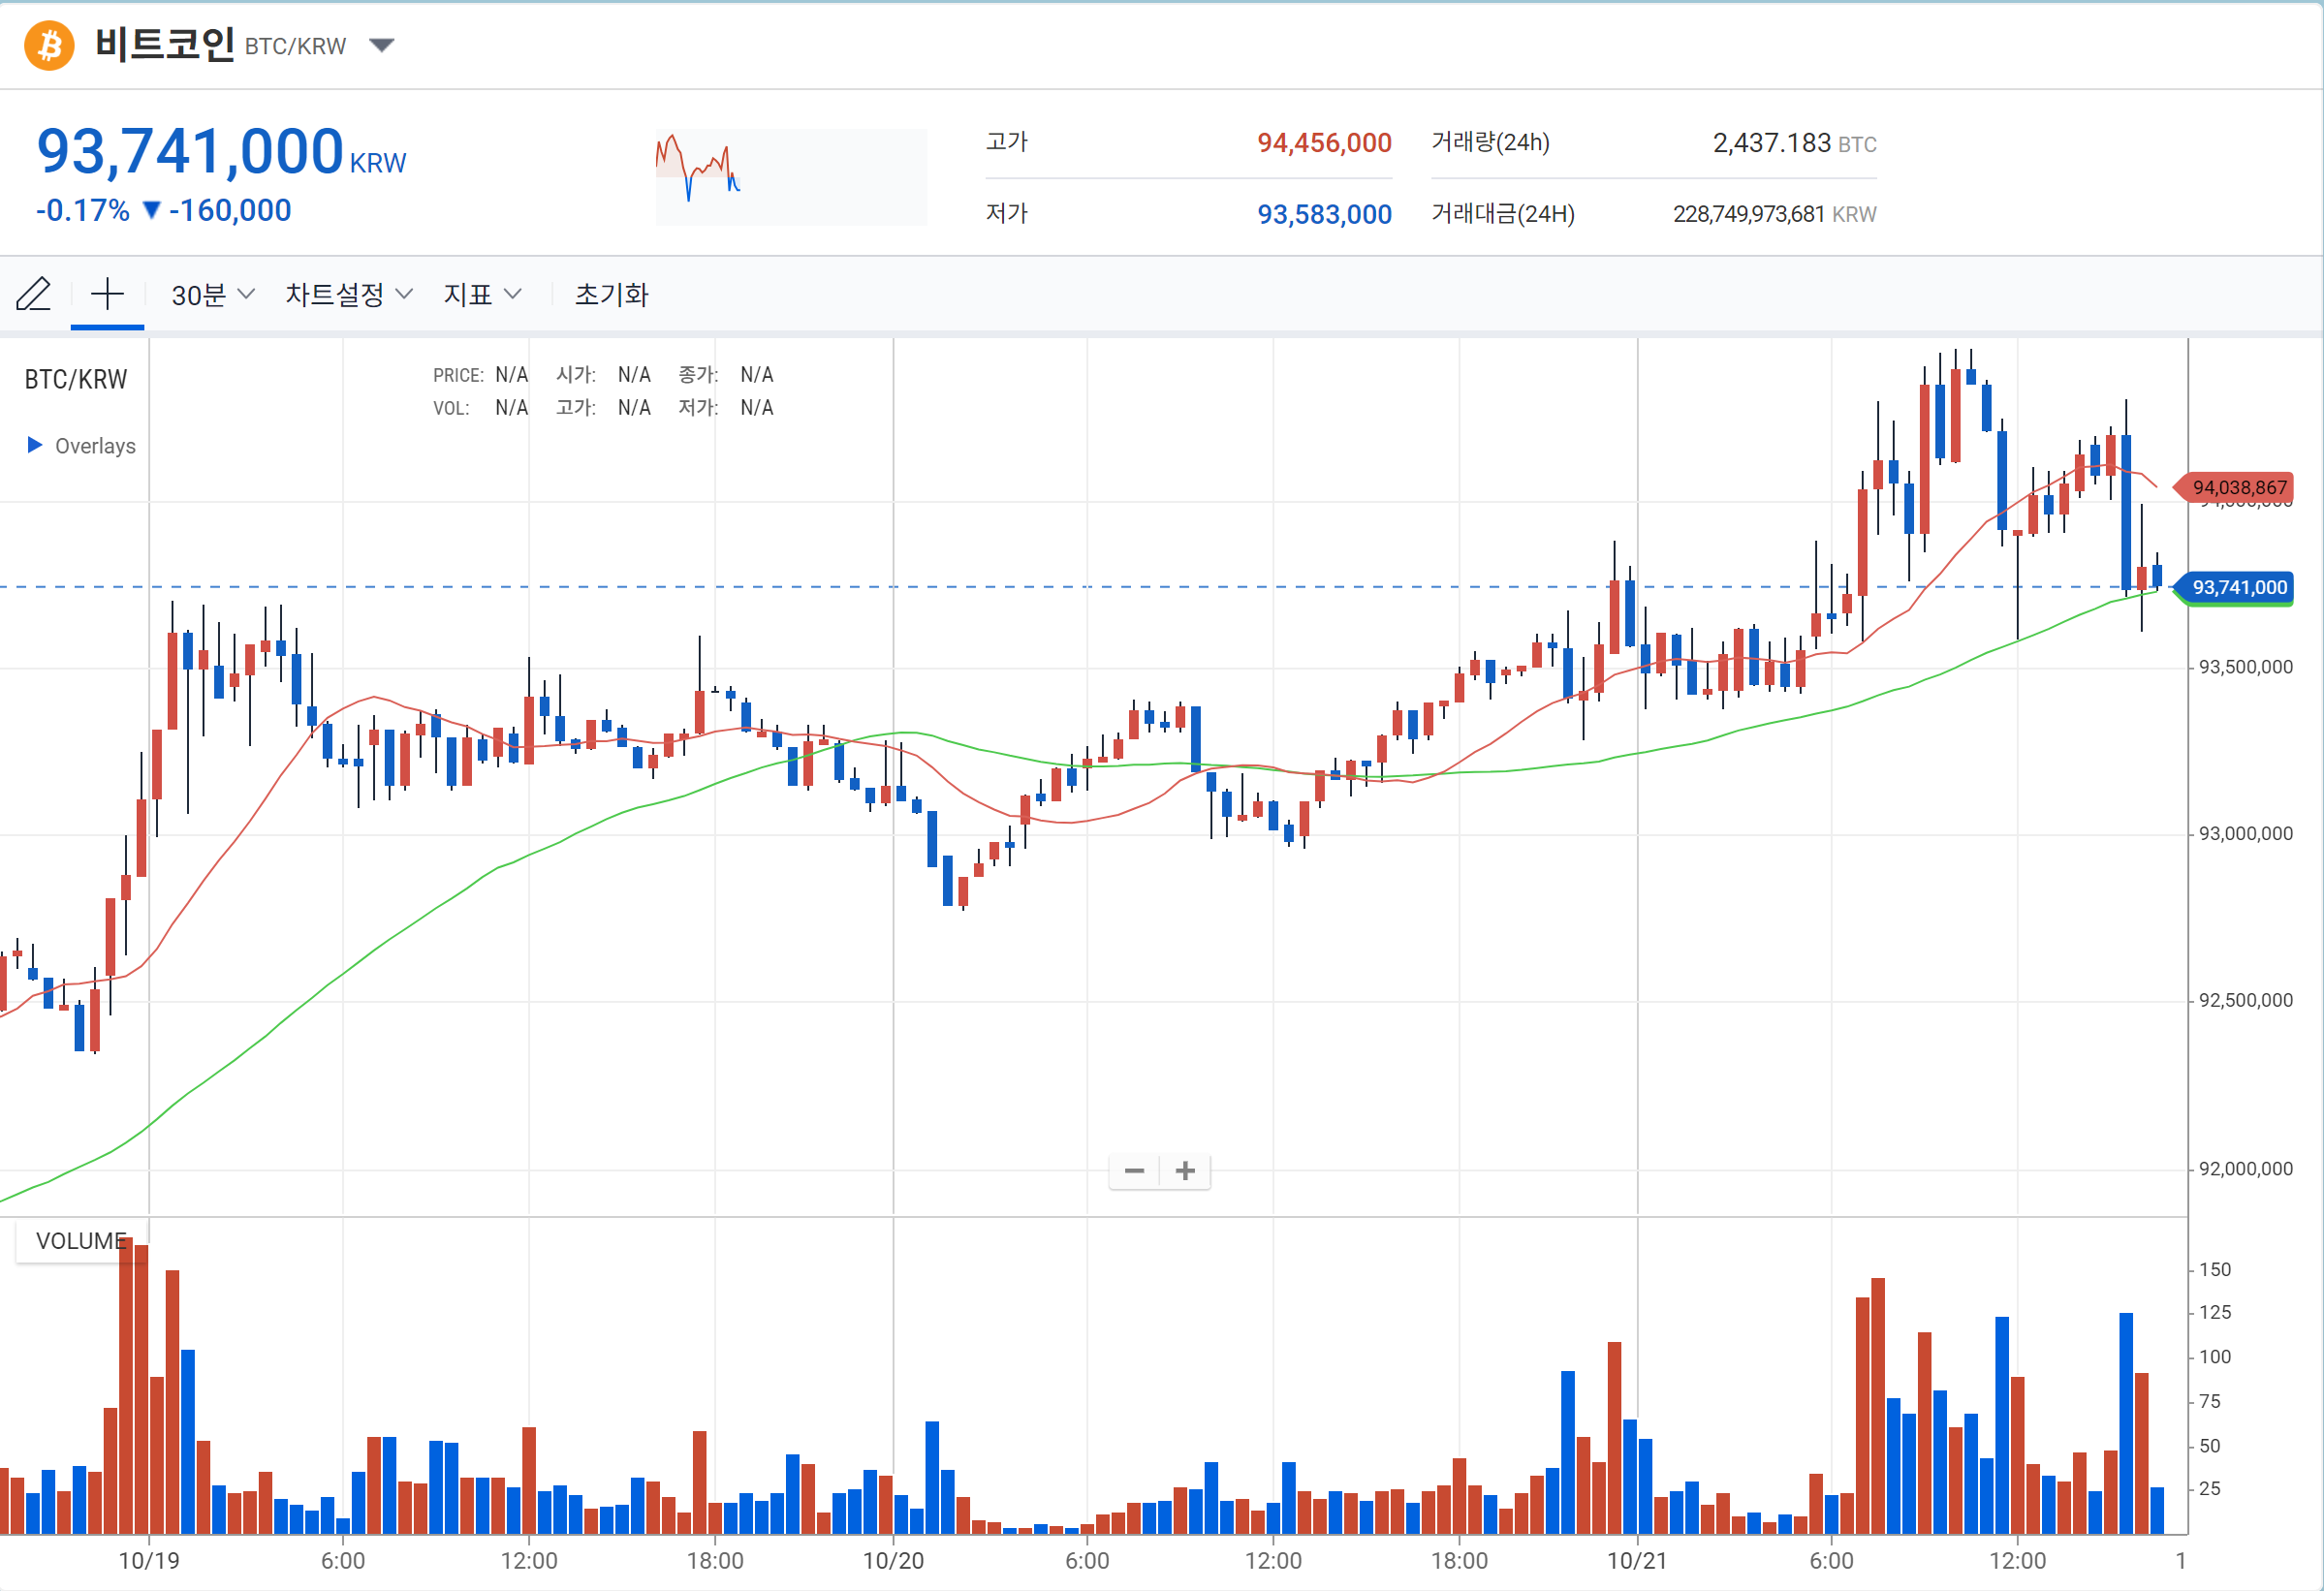

'비트코인 차트를 분석한 결과, 다음과 같은 흥미로운 사실을 발견할 수 있습니다:\n\n1. **가격 변동성**: 최근 24시간 동안 가격이 93,583,000원에서 94,456,000원 사이에서 움직였습니다. 이는 비교적 좁은 범위로, 현재 시장이 안정적임을 시사합니다.\n\n2. **거래량**: 거래량이 특정 시간대에 급증하는 모습을 보입니다. 이는 시장 참여자들이 특정 가격대에서 활발히 거래하고 있음을 나타냅니다.\n\n3. **이동평균선**: 단기 이동평균선(빨간색)이 장기 이동평균선(녹색)을 상향 돌파하는 골든 크로스가 발생했습니다. 이는 일반적으로 상승 신호로 해석됩니다.\n\n4. **가격 추세**: 최근 가격이 상승세를 보이고 있으며, 이는 매수세가 강하다는 것을 의미할 수 있습니다.\n\n### 투자 전략 제안\n\n**매수**를 추천합니다.\n\n**근거**:\n- **골든 크로스 발생**: 단기 이동평균선이 장기 이동평균선을 상향 돌파하여 상승 추세가 지속될 가능성이 높습니다.\n- **거래량 증가**: 거래량이 증가하는 것은 시장의 관심이 높아지고 있음을 나타내며, 이는 가격 상승의 신호일 수 있습니다.\n- **안정적인 가격대**: 현재 가격이 비교적 안정적인 범위 내에서 움직이고 있어, 큰 하락 위험이 낮아 보입니다.\n\n이러한 분석을 바탕으로 매수 전략을 통해 최대의 수익률을 기대할 수 있습니다. 다만, 투자 결정 시에는 항상 시장의 변동성을 고려하고, 손절매 전략을 함께 설정하는 것이 중요합니다.'

In [10]:
user_prompt2 = """당신은 가상화폐 차트를 해석하는 금융 AI 투자 전문가입니다. 
당신의 임무는 주어진 그래프 형식의 데이터를 바탕으로 흥미로운 사실을 정리하여 사용자가 해당 코인을 매수할지, 매도할지, 보류할지를 선택하는 것입니다.

정리된 사실을 바탕으로 사용자가 최대의 수익률을 내기 위한 투자 방법을 선택해야 합니다. 매도, 매수, 보류 중에 한 가지 전략을 선정하고, 그 근거를 설명해야 합니다."""

# invoke 메서드에서 사용자 프롬프트를 전달
response = multi_modal_model.invoke(IMAGE_PATH_FROM_FILE, user_prompt=user_prompt2)

# 응답 출력
print("Response Content:", response)


In [12]:
system_prompt = """당신은 가상화폐 차트를 해석하는 금융 AI 투자 전문가입니다. 
당신의 임무는 주어진 그래프 형식의 데이터를 바탕으로 흥미로운 사실을 정리하여 사용자가 해당 코인을 매수할지, 매도할지, 보류할지를 선택하는 것입니다.

정리된 사실을 바탕으로 사용자가 최대의 수익률을 내기 위한 투자 방법을 선택해야 합니다. 매도, 매수, 보류 중에 한 가지 전략을 선정하고, 그 근거를 설명해야 합니다.
"""

user_prompt = """당신에게 주어진 이미지는 비트코인의 실시간 자산 변동 그래프입니다. 이를 단계별로 확인하고, 향후 투자 전략에 관해 답변하세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


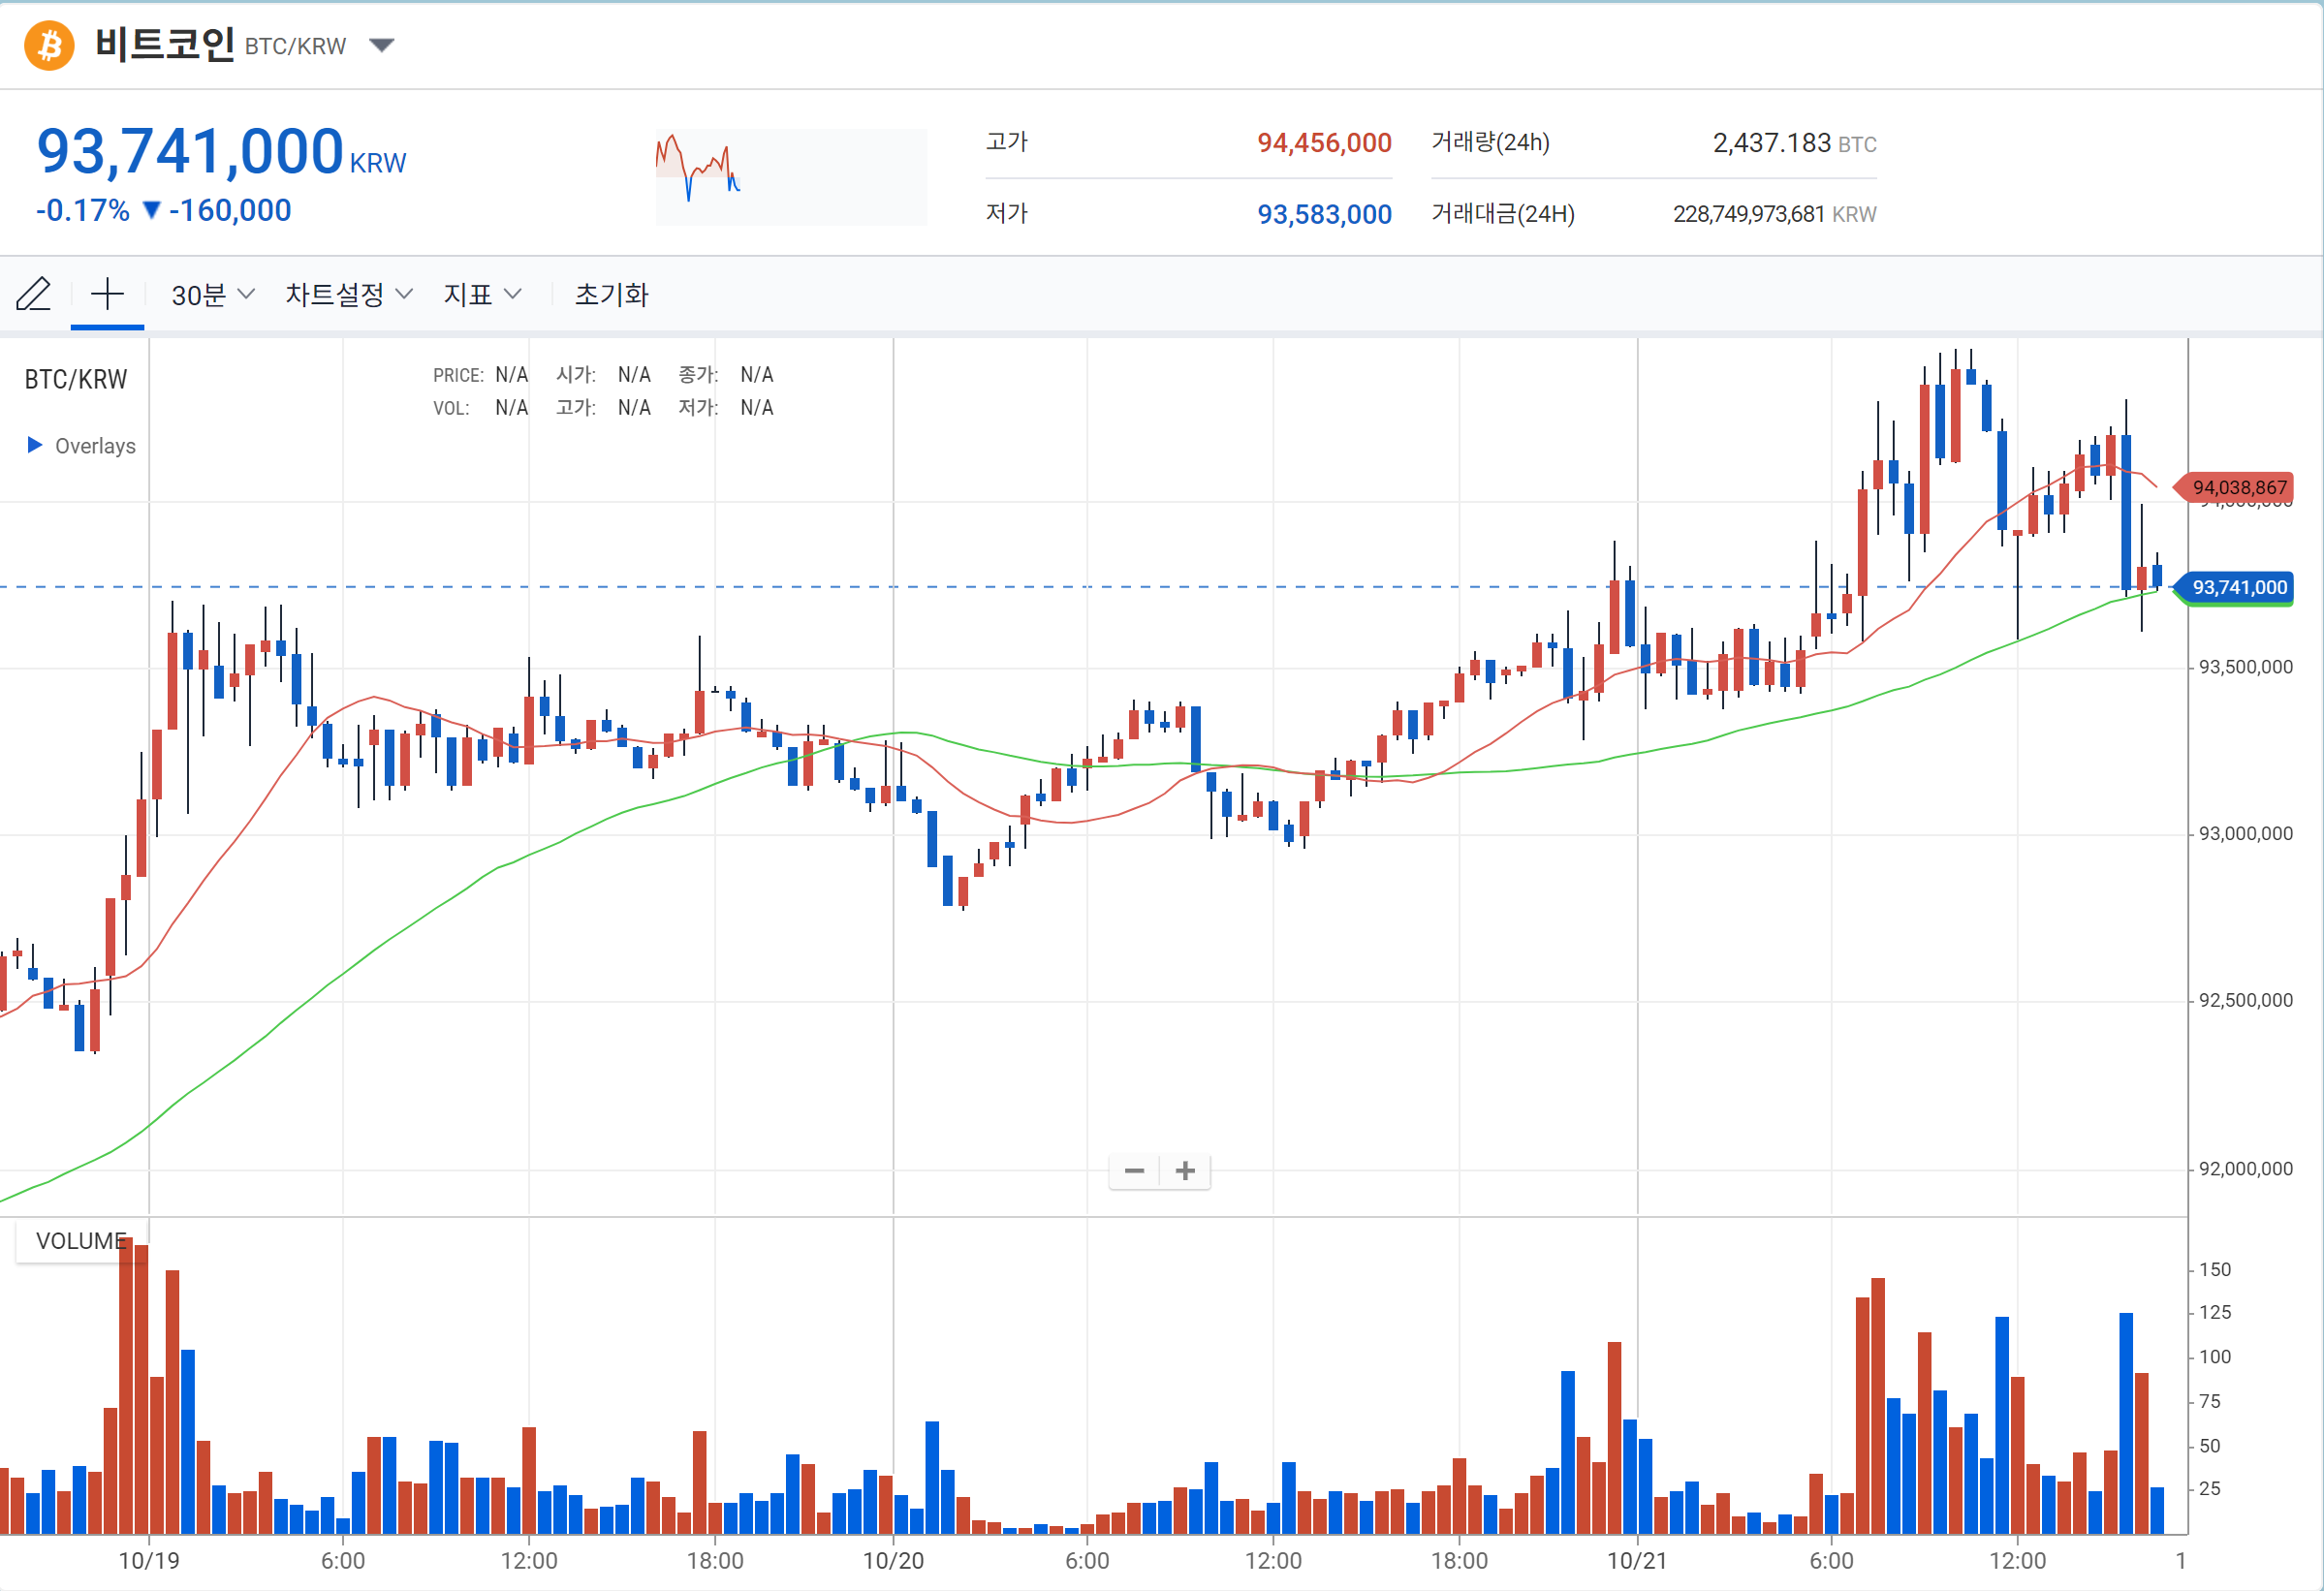

비트코인 가격 변동 그래프를 분석해보겠습니다.

1. **가격 추세**: 최근 가격은 93,741,000원으로, 약간의 하락세를 보이고 있습니다. 고점은 94,456,000원, 저점은 93,583,000원입니다.

2. **이동 평균선**: 단기 이동 평균선(빨간색)이 장기 이동 평균선(녹색) 위에 위치해 있으며, 이는 최근 상승 추세를 나타냅니다. 그러나 현재 가격이 단기 이동 평균선 아래로 내려가고 있어 주의가 필요합니다.

3. **거래량**: 최근 거래량이 증가하고 있으며, 이는 시장의 관심이 높아지고 있음을 시사합니다. 특히, 가격 하락 시 거래량이 증가하는 것은 매도 압력이 증가했음을 의미할 수 있습니다.

4. **기술적 분석**: 최근의 가격 하락과 거래량 증가를 고려할 때, 단기적으로 조정이 있을 가능성이 있습니다.

**투자 전략**: 

현재 상황에서는 **보류**를 추천합니다. 가격이 단기 이동 평균선 아래로 내려가고 있고, 거래량이 증가하는 상황에서 추가적인 하락 가능성이 있습니다. 시장의 추가적인 움직임을 관찰하면서, 가격이 안정화되거나 상승 추세로 전환될 때 매수 기회를 노리는 것이 좋습니다.

In [13]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./assets/bitcoin_241021_chart.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)


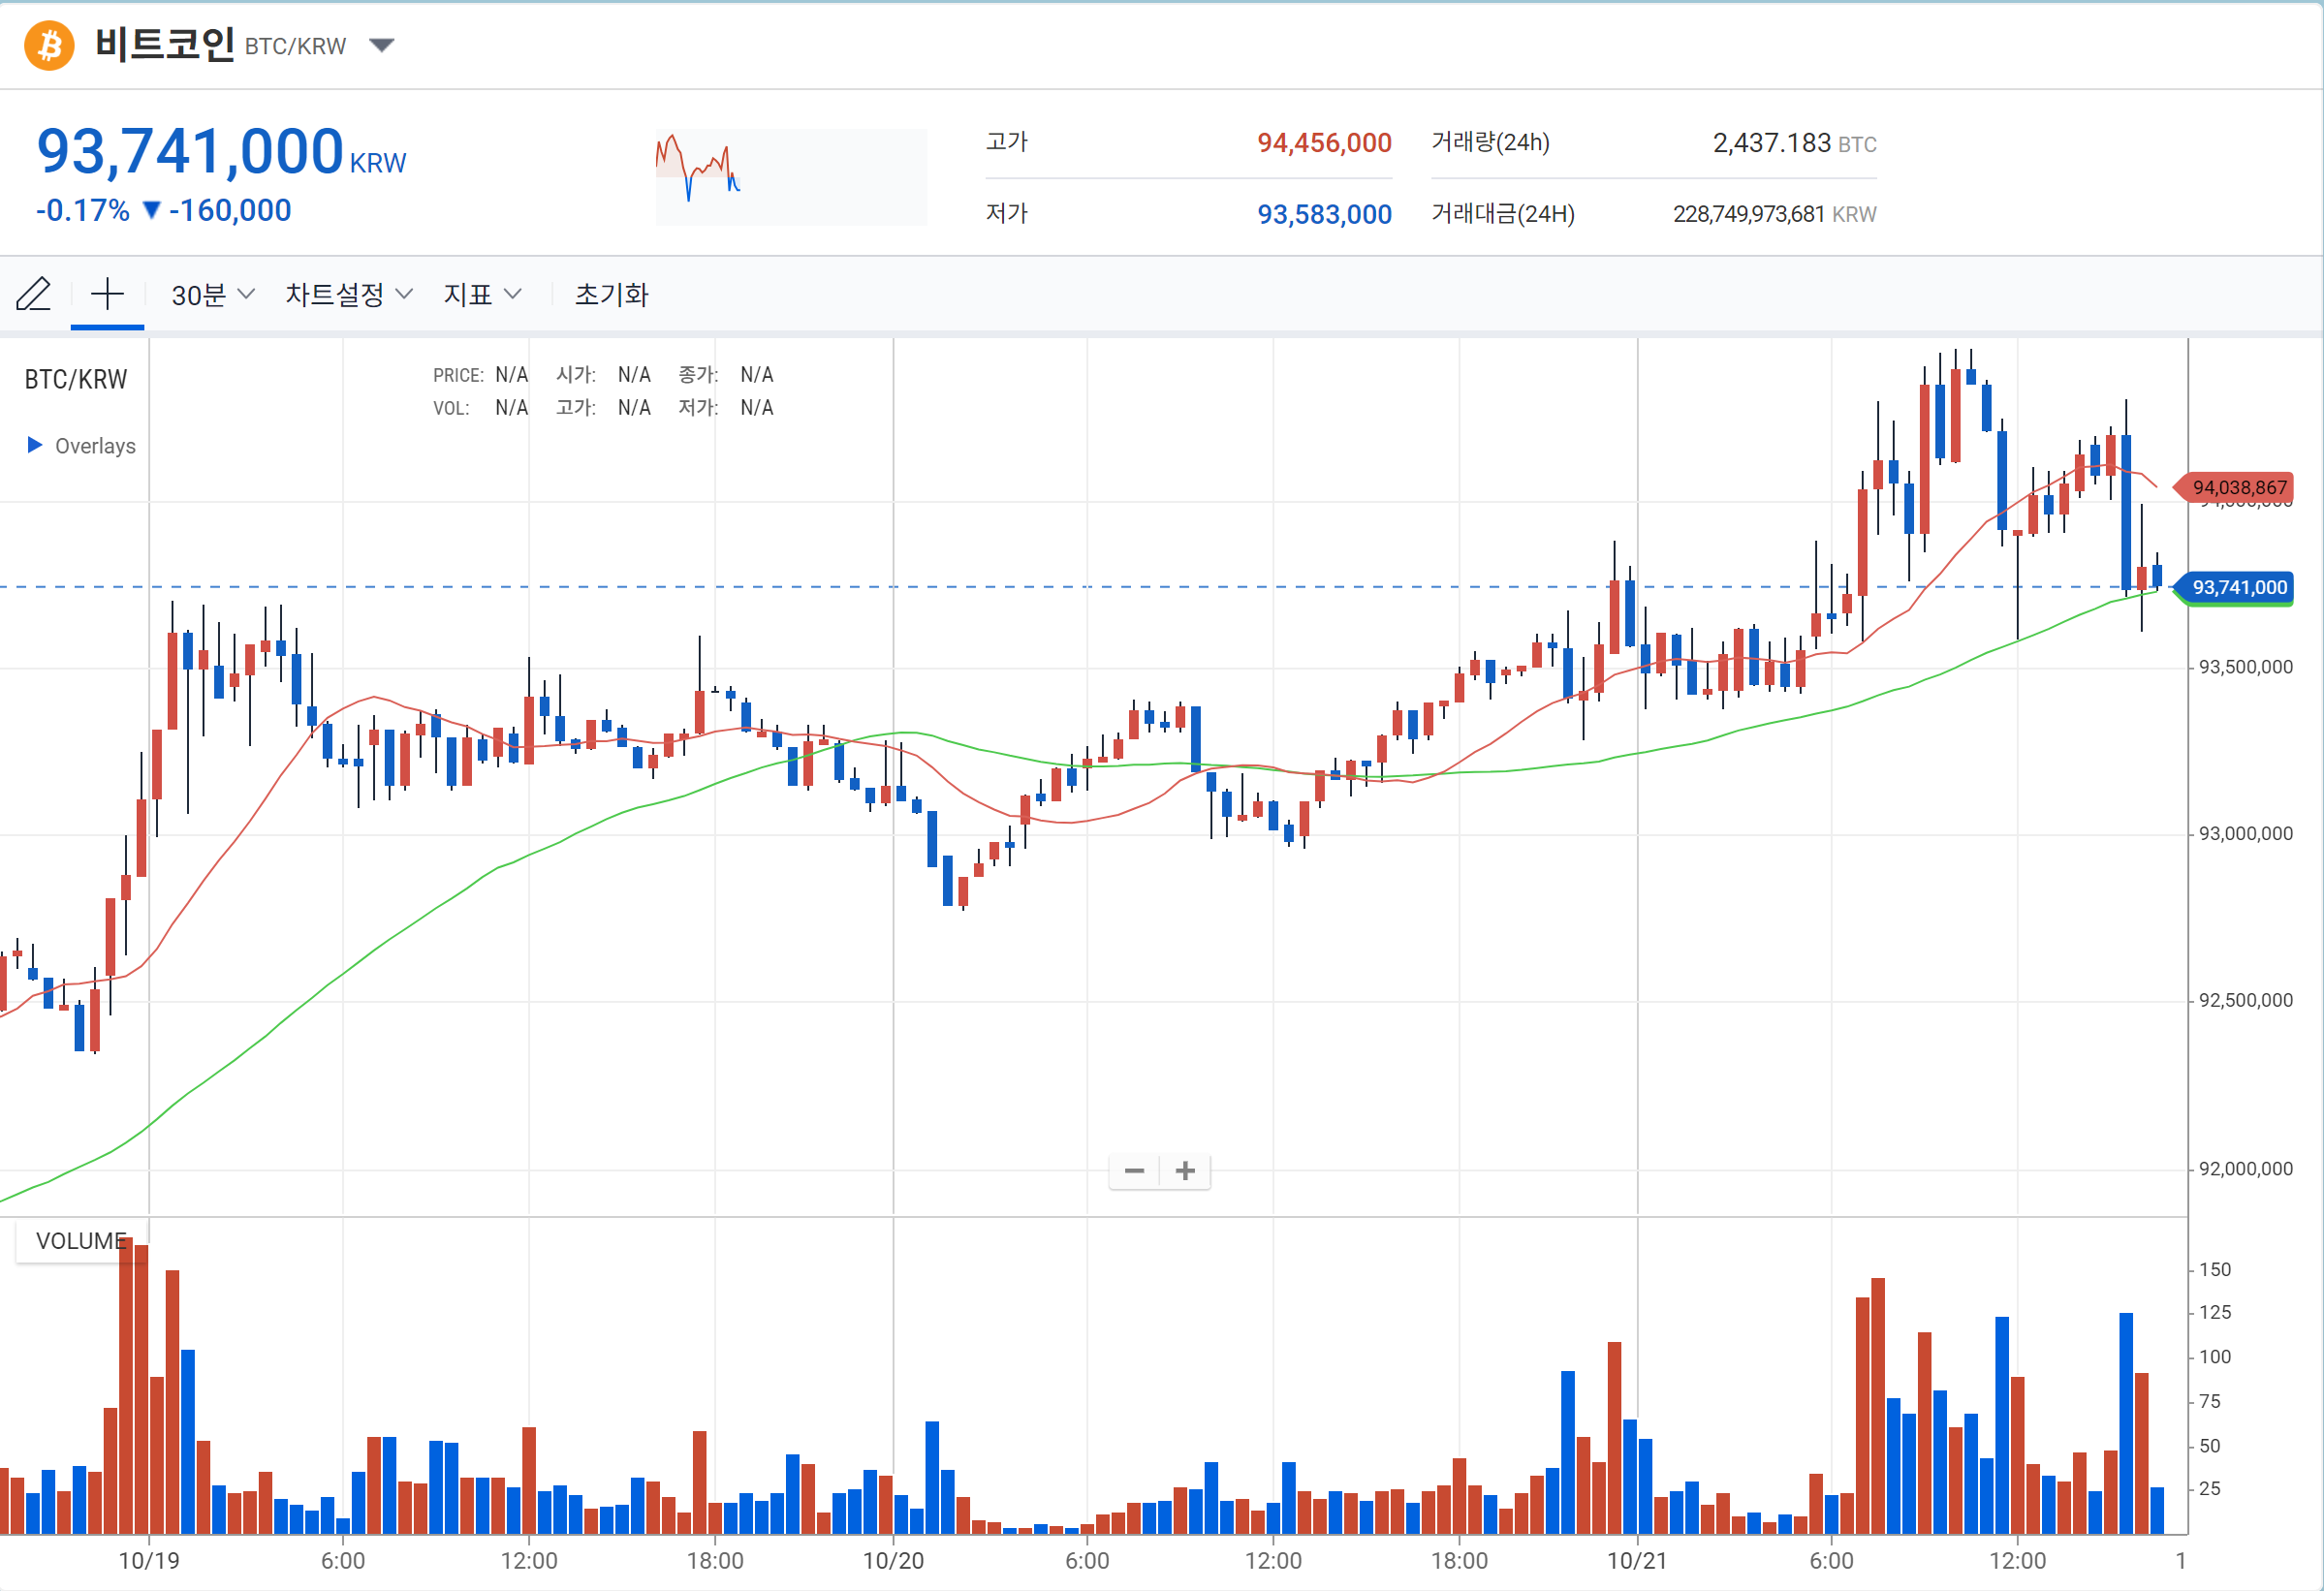

현재 비트코인 차트를 분석해보면 다음과 같은 전략을 고려할 수 있습니다:

1. **가격 변동**: 최근 가격이 하락세를 보이고 있습니다. 이는 단기적인 조정일 수 있으며, 추가적인 하락 가능성도 있습니다.

2. **거래량**: 거래량이 증가하는 구간이 보입니다. 이는 시장의 관심이 높아지고 있음을 나타내며, 가격 변동성이 커질 수 있음을 시사합니다.

3. **이동평균선**: 단기 이동평균선(빨간색)이 장기 이동평균선(녹색)을 상향 돌파한 후 다시 하락하는 모습입니다. 이는 단기적인 조정 가능성을 나타낼 수 있습니다.

### 전략 제안:

- **보류**: 현재 시장이 불안정한 상태이므로, 추가적인 가격 변동을 관찰하는 것이 좋습니다. 특히, 이동평균선의 교차와 거래량 변화를 주의 깊게 살펴보세요.

- **매수**: 만약 가격이 다시 상승세로 전환되고, 거래량이 지속적으로 증가한다면 매수 기회를 고려할 수 있습니다.

- **매도**: 이미 보유 중인 경우, 단기적인 하락세가 지속될 수 있으므로 손절매를 고려할 수 있습니다.

항상 리스크 관리에 유의하시고, 시장의 변동성을 주의 깊게 관찰하세요.

In [15]:
system_prompt = """당신은 가상화폐 차트를 해석하는 금융 AI 투자 전문가입니다.
사용자가 비트코인 차트를 바탕으로 매수, 매도, 보류 중에서 선택할 수 있도록 도와주세요.
적절한 투자 전략을 제시하고, 그 이유를 설명하세요.
"""

user_prompt = """현재 비트코인 차트를 분석해 주세요. 가격 변동, 거래량, 이동평균선을 고려해 어떤 전략이 적합한지 알려 주세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)


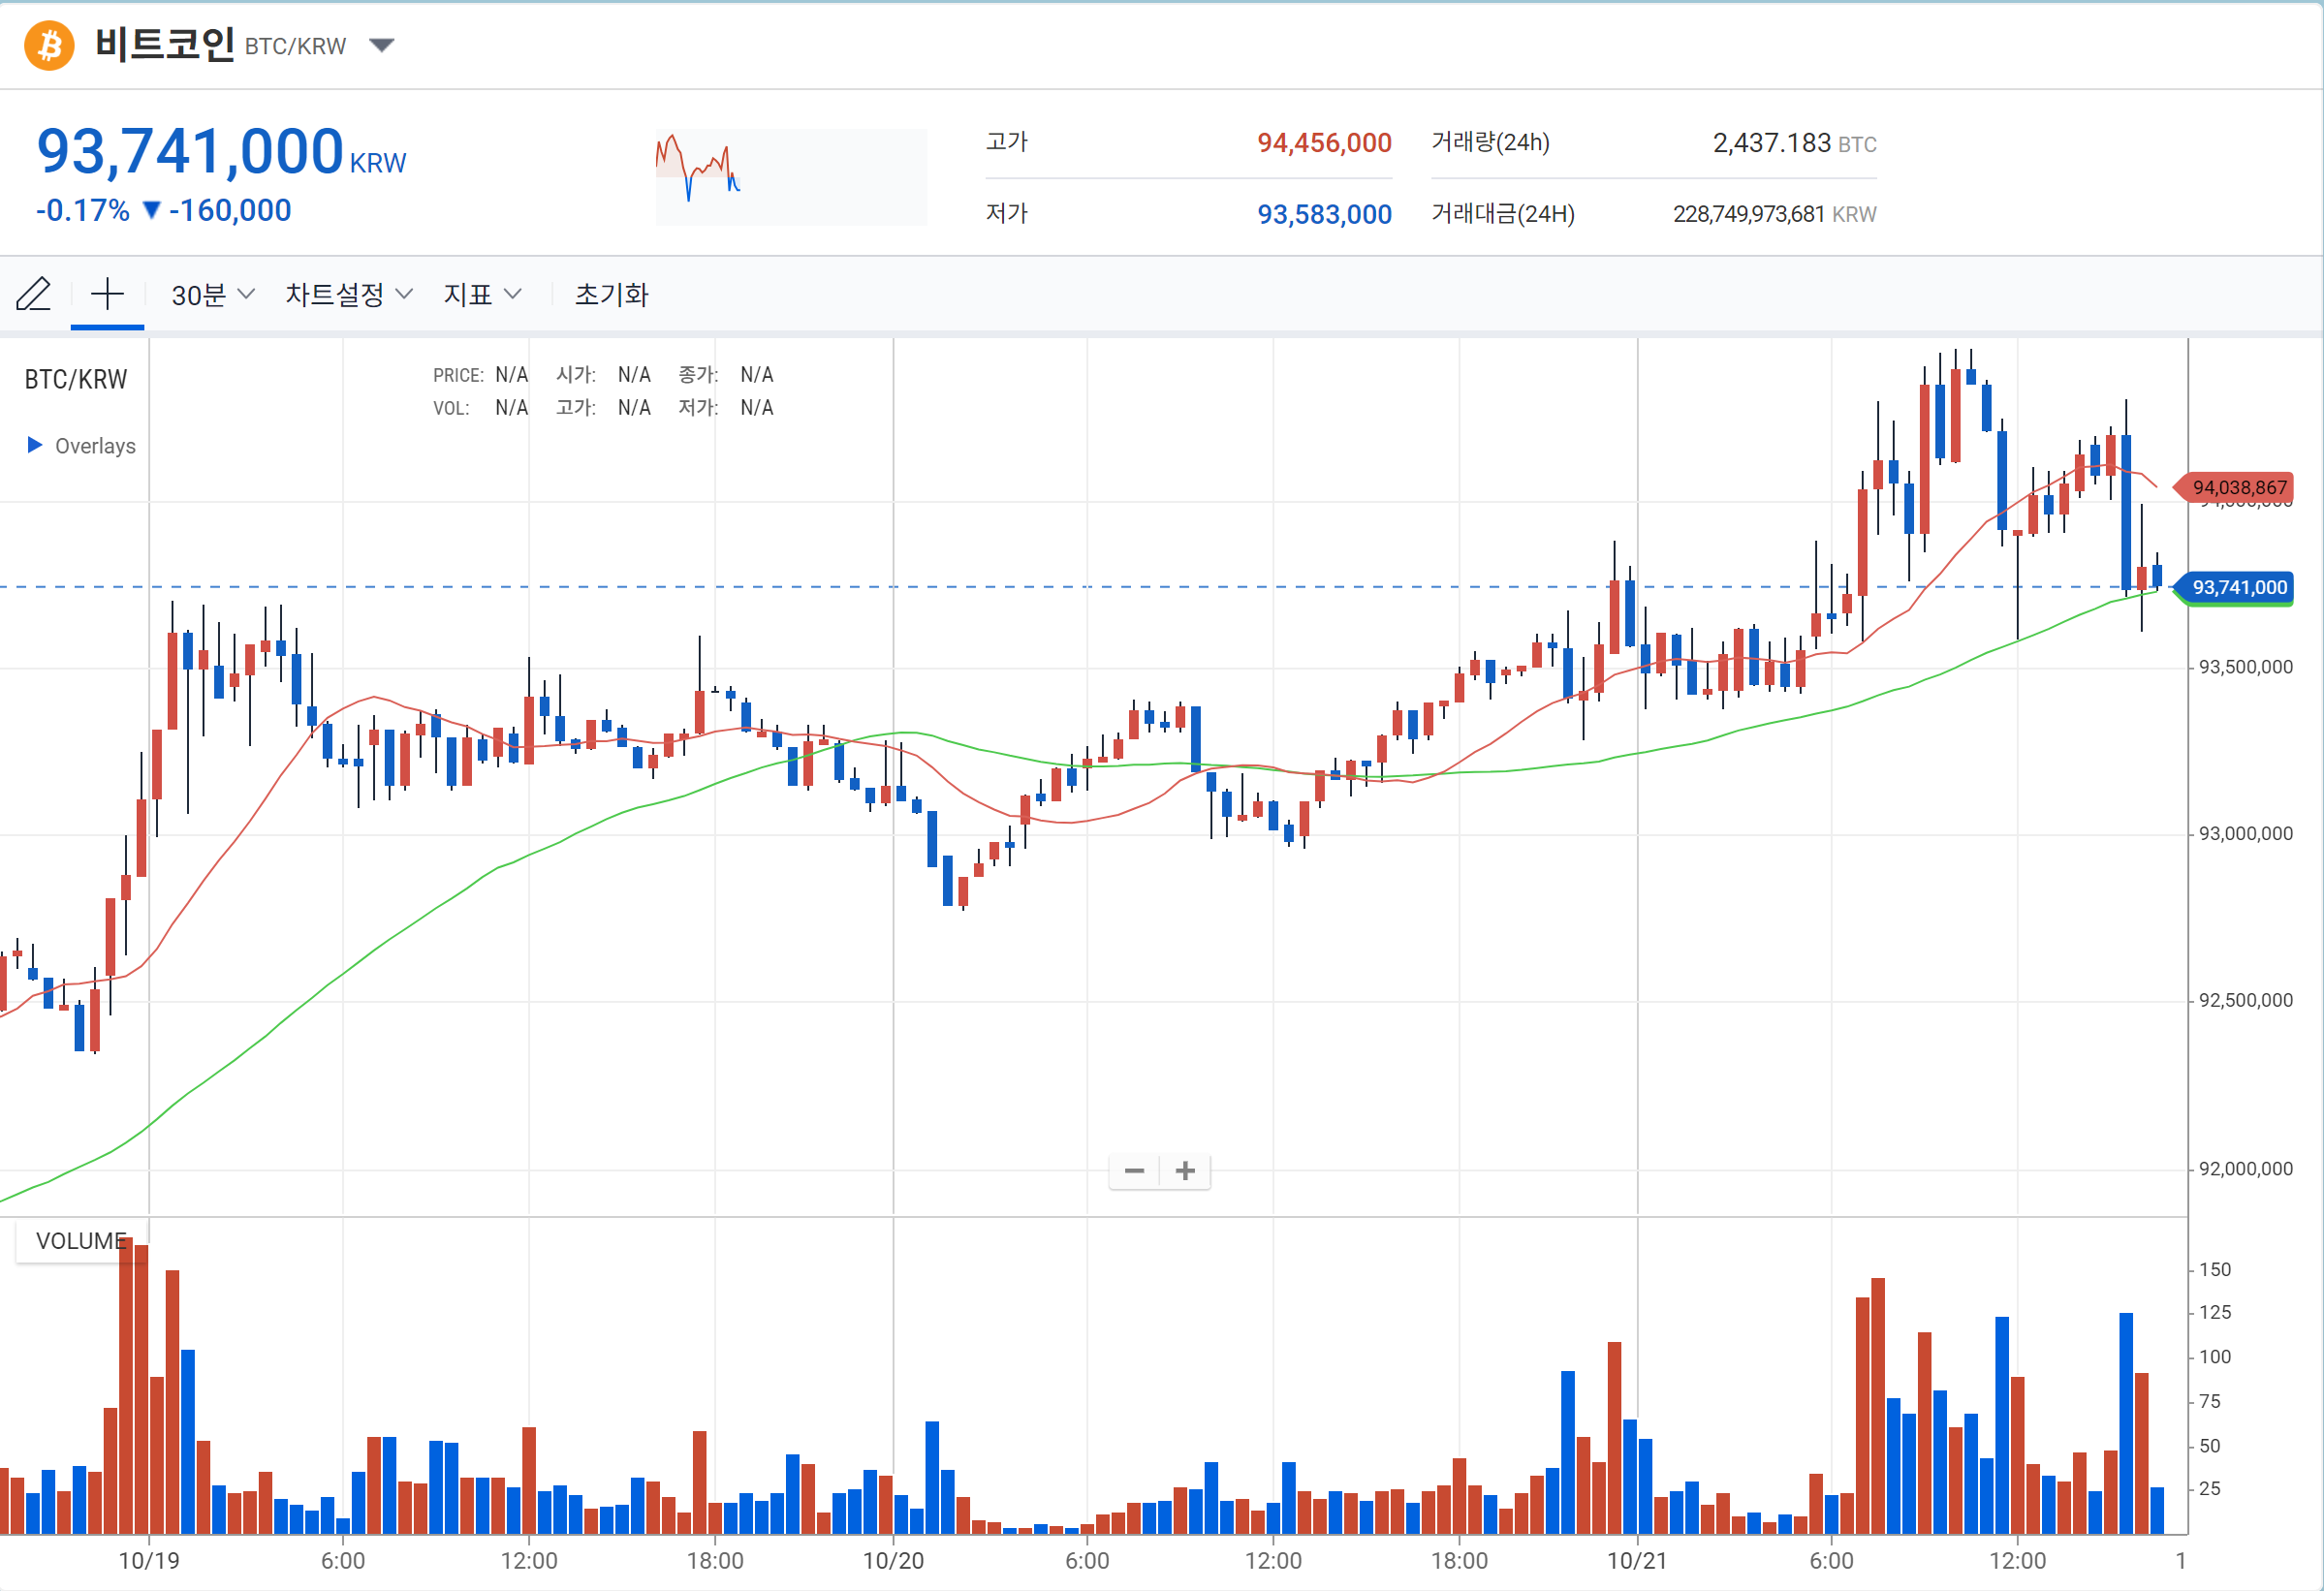

'현재 비트코인 차트를 분석해보면 다음과 같은 전략을 고려할 수 있습니다:\n\n1. **가격 변동**: 최근 가격이 약간 하락세를 보이고 있습니다. 이는 단기적인 조정일 수 있습니다.\n\n2. **거래량**: 거래량이 증가하는 구간이 보입니다. 이는 시장 참여자들이 활발하게 거래하고 있음을 나타내며, 가격 변동의 신호일 수 있습니다.\n\n3. **이동평균선**: 단기 이동평균선(빨간색)이 장기 이동평균선(녹색)을 상향 돌파한 후 다시 하향하는 모습이 보입니다. 이는 단기적인 조정 가능성을 시사합니다.\n\n### 전략 제안:\n\n- **보류**: 현재 시장이 조정 국면에 있을 가능성이 있으므로, 추가적인 가격 변동을 관찰하면서 신중하게 접근하는 것이 좋습니다. 특히, 이동평균선의 교차와 거래량 변화를 주의 깊게 살펴보세요.\n\n- **매수 기회 탐색**: 만약 가격이 다시 상승세로 전환되고, 거래량이 지속적으로 증가한다면 매수 기회를 고려할 수 있습니다.\n\n항상 시장의 변동성을 고려하고, 리스크 관리에 유의하시기 바랍니다.'

In [16]:
system_prompt = """당신은 가상화폐 차트를 해석하는 금융 AI 투자 전문가입니다.
사용자가 비트코인 차트를 바탕으로 매수, 매도, 보류 중에서 선택할 수 있도록 도와주세요.
적절한 투자 전략을 제시하고, 그 이유를 설명하세요.
"""

user_prompt = """현재 비트코인 차트를 분석해 주세요. 가격 변동, 거래량, 이동평균선을 고려해 어떤 전략이 적합한지 알려 주세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.invoke(IMAGE_PATH_FROM_FILE)

answer